<a href="https://colab.research.google.com/github/odixibo/PunishCoder/blob/main/Lect18_sns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# <center>Небольшой мануал по основным графикам в seaborn</center>

Далее будем использовать встроенный набор данных о чаевых.

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


В библиотеках Matplotlib и Seaborn для визуализации данных существует много различных функций построения графиков. Однако такие функции разумно применять не на любых признаках. Мы с вами уже изучали, что признаки (или переменные) могут быть количественными и категориальными. Очень хорошо, если вы умеете их отличать. В зависимости от типов признаков существуют свои функции построения графиков. Рассмотрим наиболее часто используемые из них на конкретных данных.

# 1. Признаки по-одному

## 1.1 Количественные

Количественные признаки можно отображать следующими полезными функциями:
* `histplot`
* `boxplot`

### `histplot`

`histplot` с параметром `kde=True` показывает гистограмму и график плотности распределения

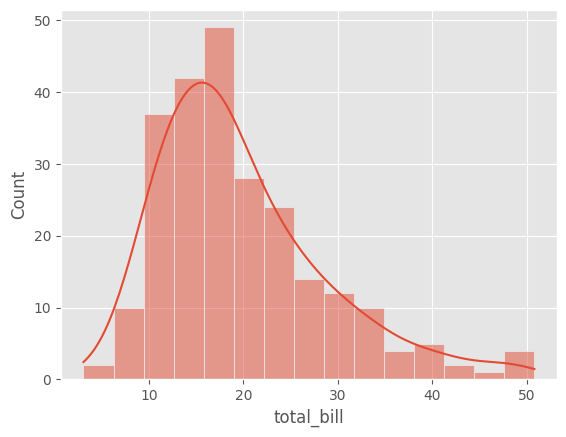

In [4]:
sns.histplot(tips['total_bill'], kde = True, bins=15)
plt.show()

### `boxplot`

<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem10_visual/images/boxplot.png?raw=true" height="400" width="700">
</center>

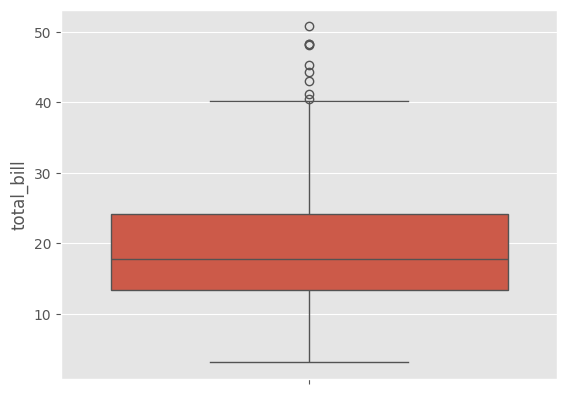

In [ ]:
sns.boxplot(tips['total_bill'])
plt.show()

## 1.2 Категориальные

### `countplot`

Считаем количество значений в каждой категории.

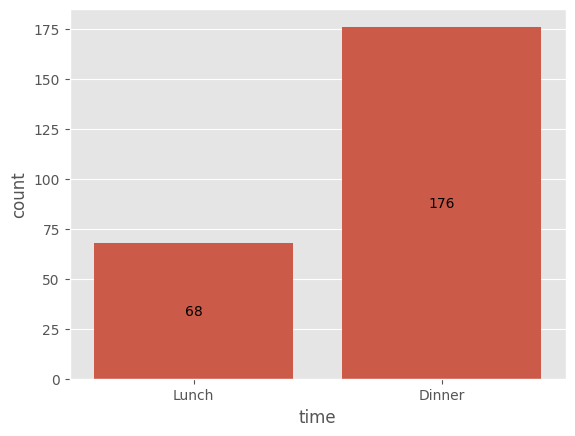

In [ ]:
ax = sns.countplot(x = 'time', data = tips)
for i in ax.containers:
    ax.bar_label(i, label_type='center')

# 2. Взаимодействие признаков

## 2.1 Количественный с количественным

### `jointplot`

`jointplot` показывает совместное распределение по двум переменным. Она имеет параметр `kind`, который может принимать следующие значения:
* `scatter`
* `reg`
* `resid`
* `kde`
* `hex`

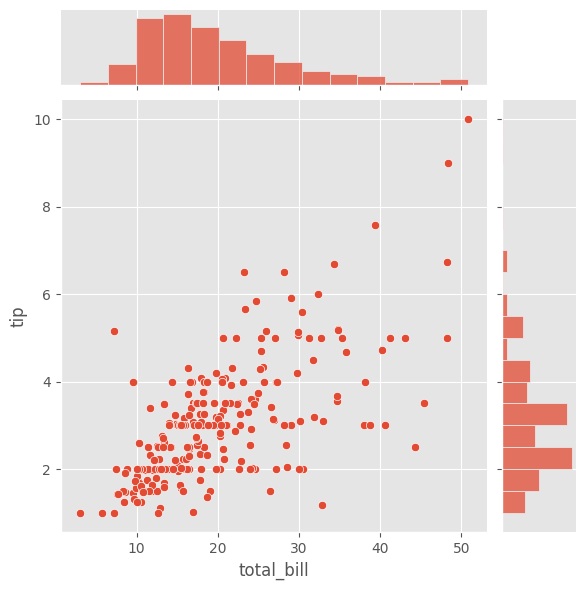

In [ ]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'scatter');

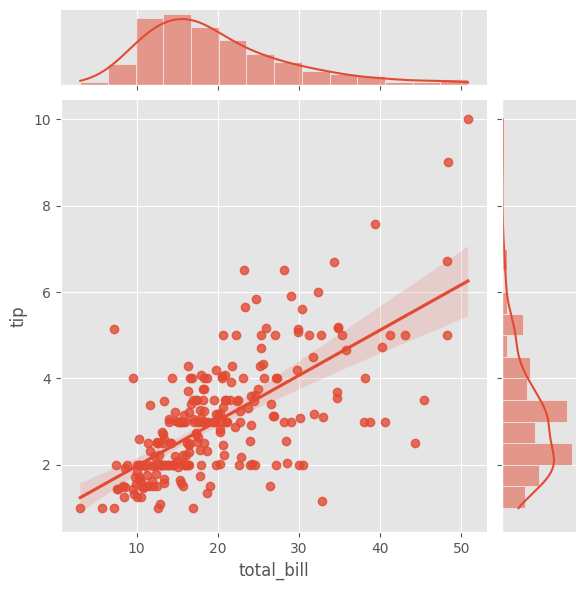

In [ ]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'reg');

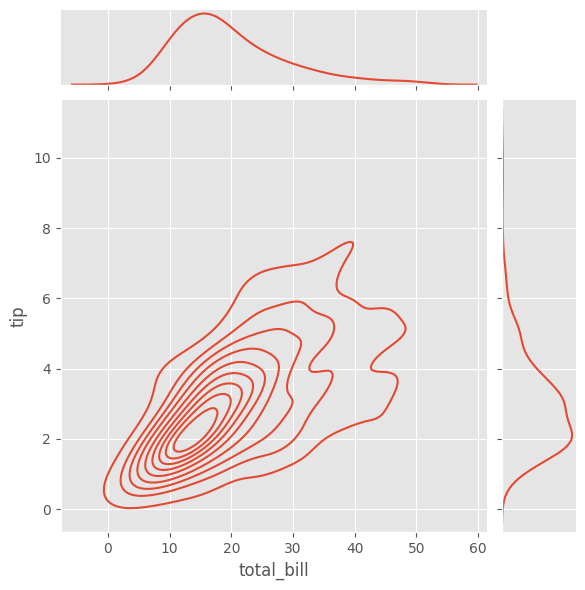

In [ ]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'kde');

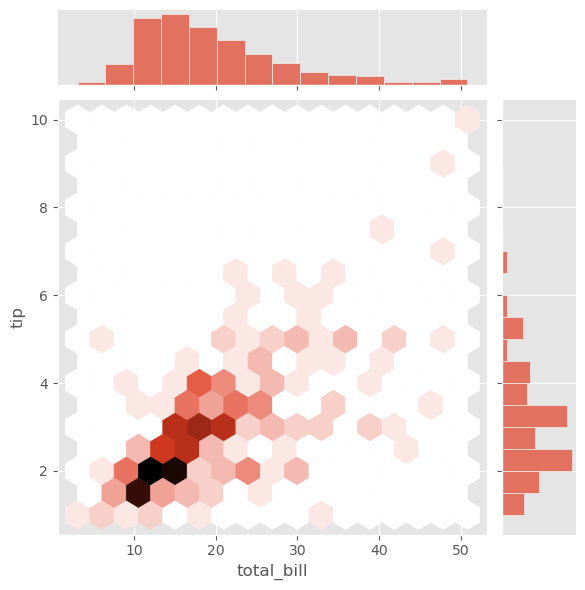

In [ ]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'hex');

## 2.2 Количественный с категориальным

### `barplot`

`barplot` аггрегирует данные по значениям категориальной переменной и применяет определенную функцию к значениям соответствующих групп количественной переменной. По умолчанию это функция **среднее**, однако эту функцию можно изменить в параметре `estimator`

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


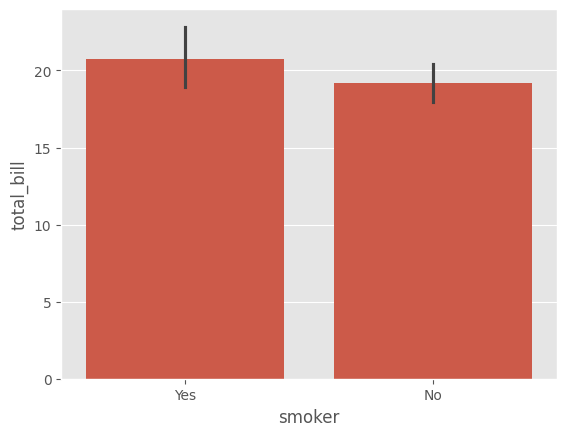

In [ ]:
sns.barplot(x = 'smoker', y = 'total_bill', data = tips);

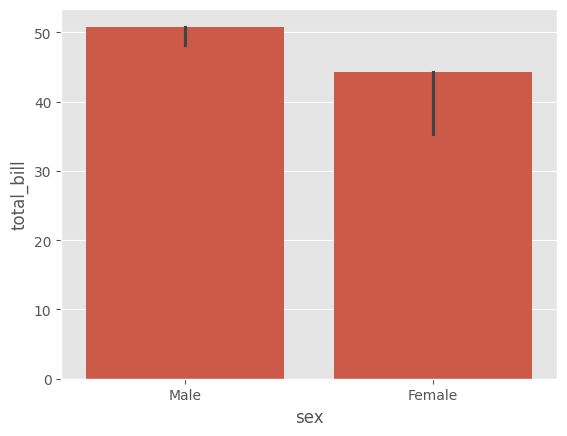

In [ ]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.min);

### `boxplot`

И снова уже рассматриваемая нами функция `boxplot`. При взаимодействии признаков эта функция может быть в разы полезнее, так как все нагляднее в сравнении!

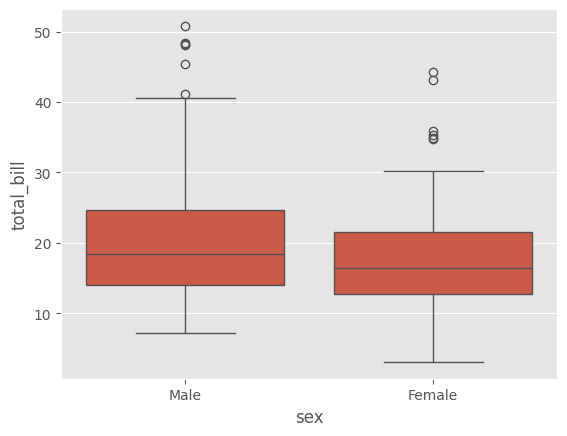

In [ ]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips);

Для удобства можно перевернуть

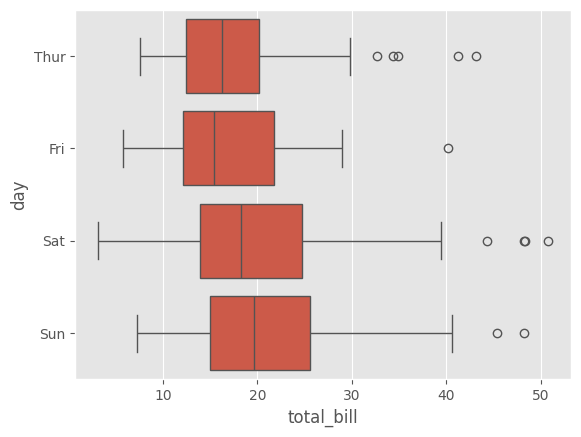

In [ ]:
sns.boxplot(x = 'total_bill', y = 'day', data = tips, orient = 'h');

А можно так вообще открыть третье измерение

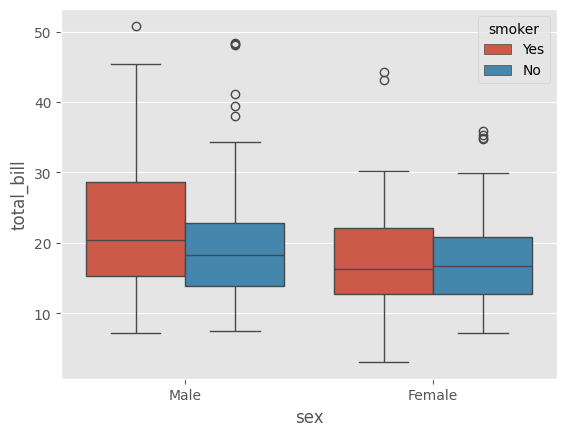

In [ ]:
sns.boxplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = tips);

## 2.3 Комбинации всех признаков в выборке

### `pairplot`

`pairplot` показывает отношение между всеми парами переменных. На диагонали находятся гистограммы, а на других местах - диаграммы рассеивания

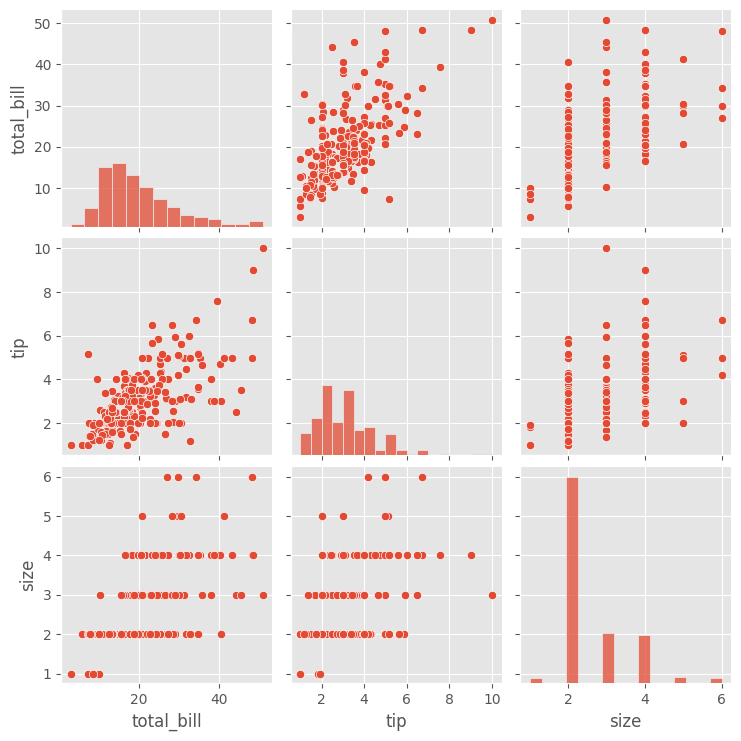

In [ ]:
sns.pairplot(tips);

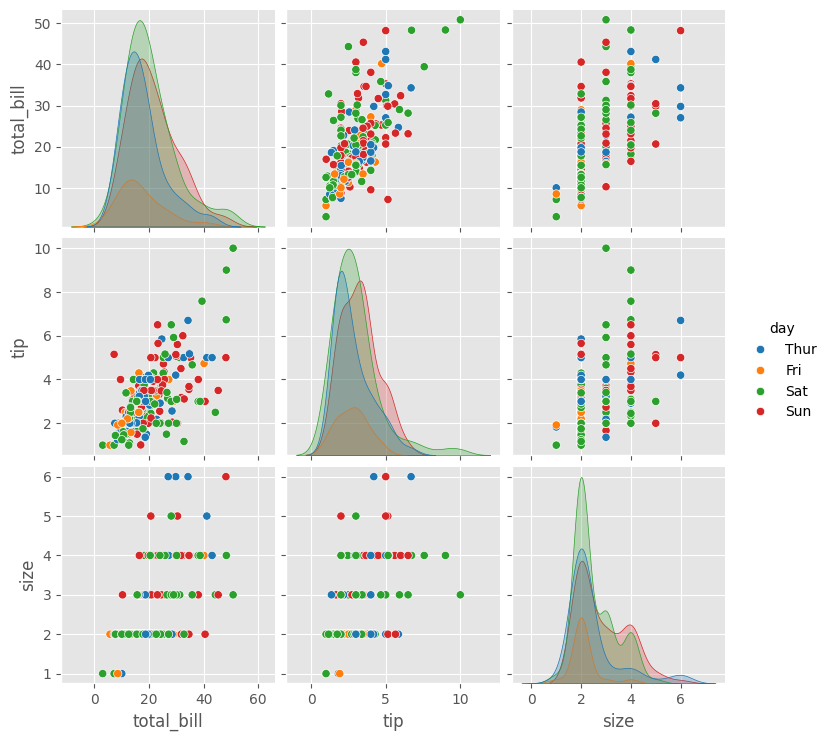

In [ ]:
sns.pairplot(tips, hue = 'day', palette='tab10');

### `PairGrid`

`PairGrid` это более расширенная функция, позволяющая показывать отношения между всеми парами параметров по различным функциям. По сути `pairplot` является ее частным случаем.

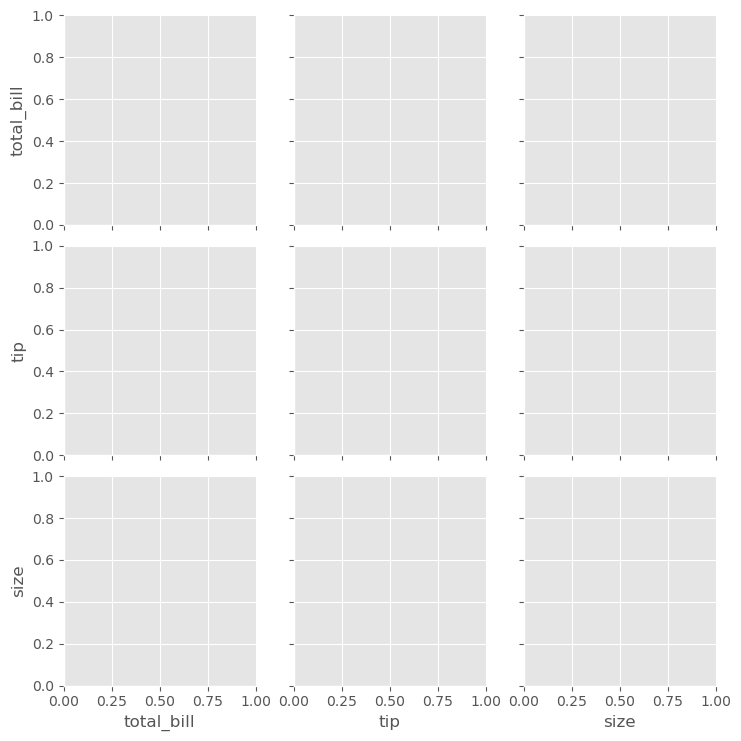

In [ ]:
sns.PairGrid(tips);

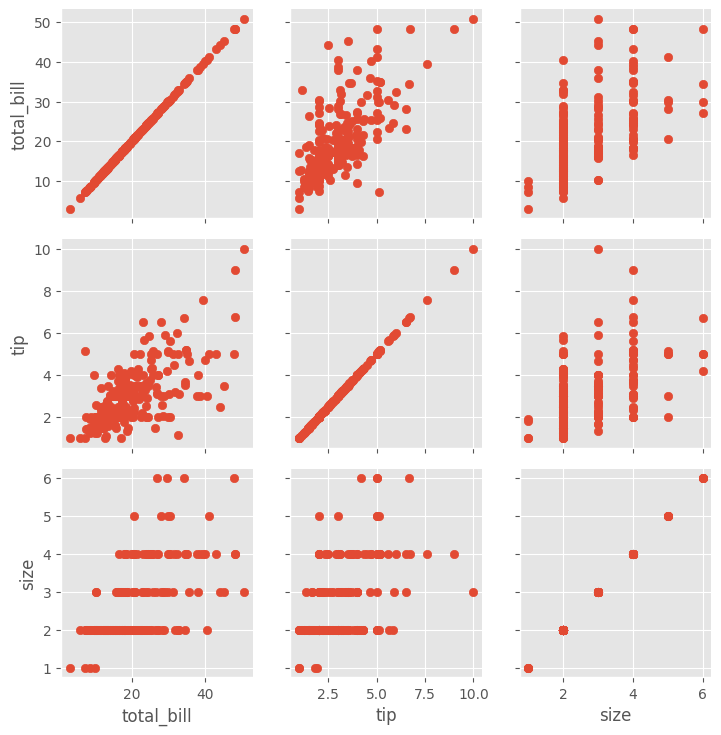

In [ ]:
g = sns.PairGrid(tips)
g.map(plt.scatter);

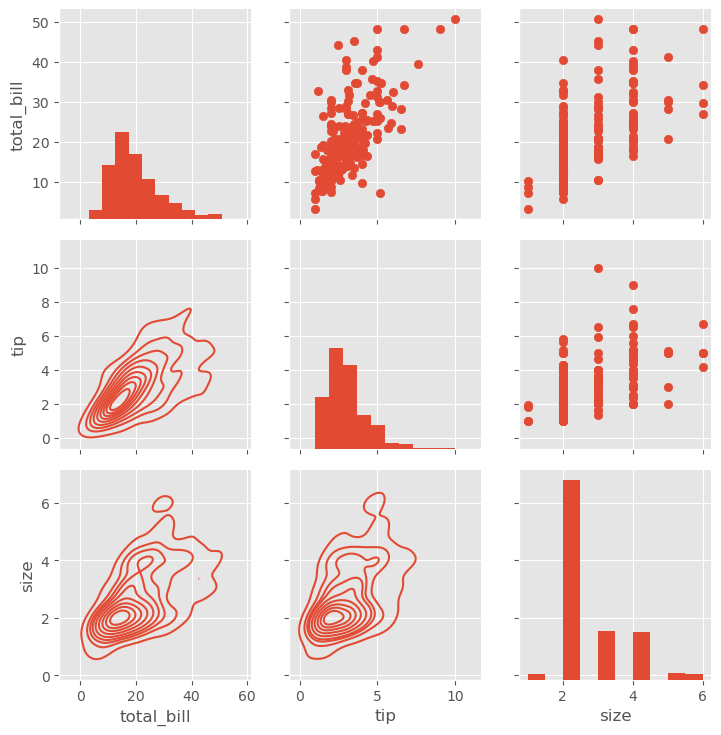

In [ ]:
g = sns.PairGrid(tips)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

## 2.4 Количественный и несколько категориальных

### `FacetGrid`
`FacetGrid` позволяет визуализировать совместное распределение отдельных признаков нескольких переменных

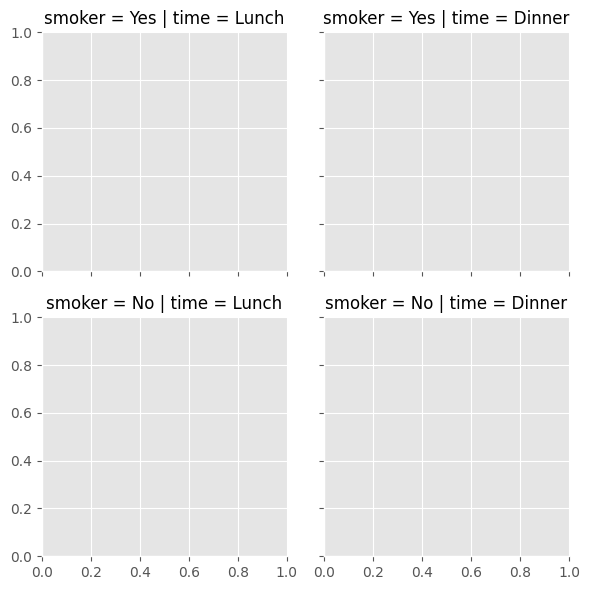

In [ ]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker');

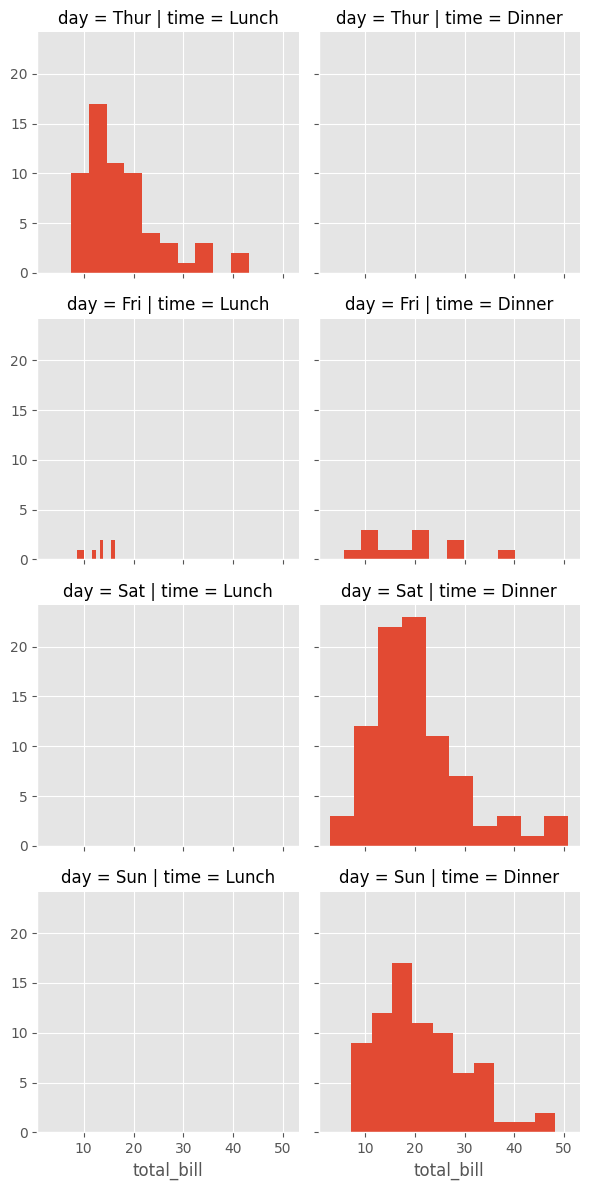

In [ ]:
g = sns.FacetGrid(tips, col = 'time', row = 'day');
g = g.map(plt.hist, 'total_bill');

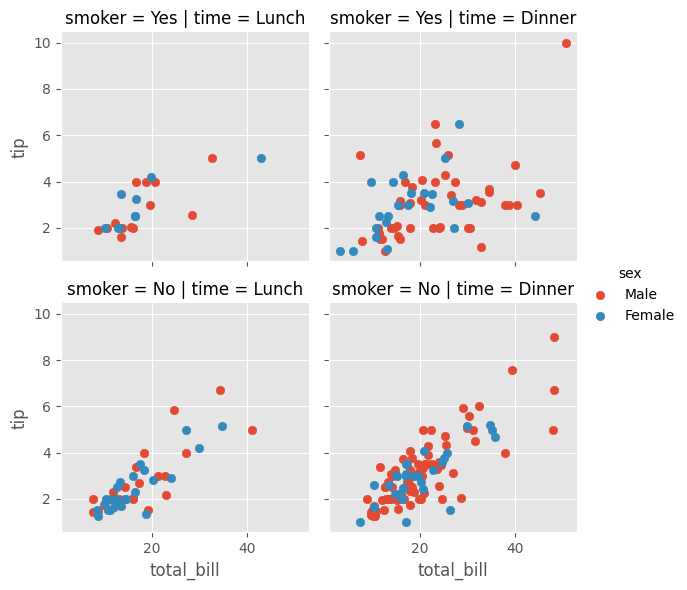

In [ ]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker', hue = 'sex');
g = g.map(plt.scatter, 'total_bill', 'tip').add_legend();

# 3. Матричные графики

In [ ]:
tips.select_dtypes(exclude = 'number')

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [ ]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


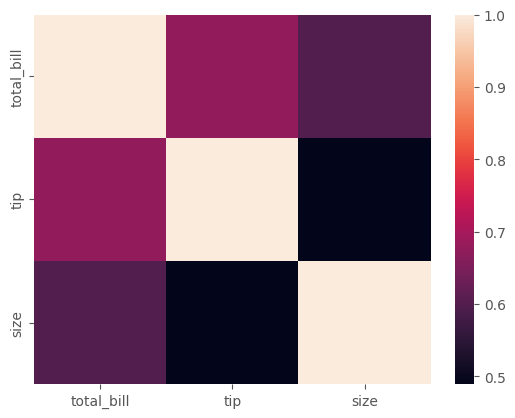

In [ ]:
sns.heatmap(tips.select_dtypes(include = 'number').corr());

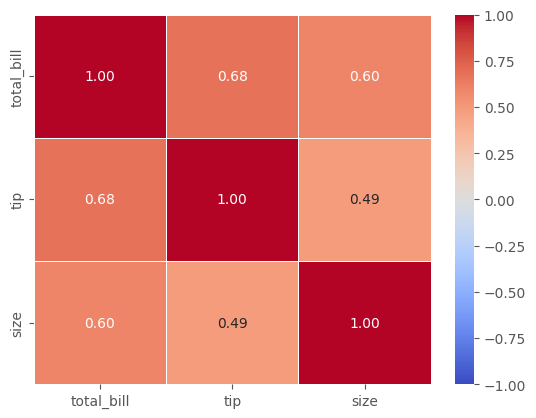

In [8]:
sns.heatmap(
    tips.select_dtypes(include = 'number').corr(),
    annot=True,         # подписываем числа корреляции
    fmt=".2f",           # формат подписей
    cmap="coolwarm",     # цветовая схема
    vmin=-1, vmax=1,     # границы шкалы
    linewidths=0.5,      # линии между ячейками
);

In [7]:
flights = sns.load_dataset('flights')

In [ ]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


Посчитаем таблицу сопряженности, которая покажет, какое кол-во пассажиров летало в различные месяцы в каждый из годов в промежутке от 1949 по 1960.

In [9]:
pvflights = flights.pivot_table(values = 'passengers', index = 'month', columns = 'year')
pvflights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


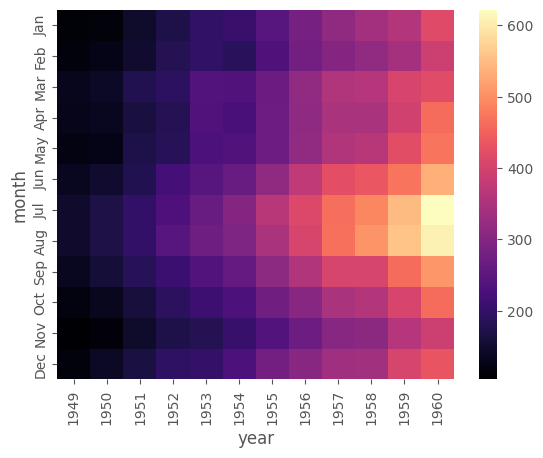

In [10]:
sns.heatmap(pvflights, cmap = 'magma');